In [1]:
import numpy as np 
import pandas as pd 

In [45]:
# load the data
df = pd.read_csv("wine.csv")

In [46]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [47]:
def wine_label(q):
    if q > 5:
        return 1 
    else: 
        return 0
df["quality"] = df["quality"].apply(wine_label)

In [48]:
df['quality'].value_counts()

quality
1    4113
0    2384
Name: count, dtype: int64

In [49]:
#  wine type is not related to quality. Drop this column
df.drop(columns = ['wine type'] , axis = 1 , inplace = True)

In [50]:
# column citric acid values with greater than 0.95 is outlier remove all where value crosses the thresold 
df[df['citric acid'] > 0.95].shape

(9, 12)

In [51]:
# column citric acid values with greater than 0.95 is outlier remove all where value crosses the thresold 
df = df[df['citric acid'] <= 0.95]

In [52]:
# residual sugar column has outlier, remove all rows where values are greater than 25
df[df['residual sugar'] > 25]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3671,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,1
4701,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,1
5479,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,1
5857,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,1
6180,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,1


In [53]:
# residual sugar column has outlier, remove all rows where values are greater than 25
df = df[df['residual sugar'] <= 25]

In [54]:
# total sulfur dioxide has outlier 
df = df[df['total sulfur dioxide'] <= 280]

In [55]:
# fixed acidity is almost same for all quality , also correlation is -0.08 not really correlated 
df = df.drop(columns=["fixed acidity"])

In [56]:
# `density` is not changing for `quality` not an usefull column , drop this column
df = df.drop(columns = ['density'])

In [57]:
# pH is not changing for quality not an usefull column drop this column 
df = df.drop(columns = ['pH'])

In [58]:
# quality is not really depending on sulphates, drop this column 
df = df.drop(columns = ['sulphates'])

In [59]:
# seprate X and y 
X = df.drop("quality" , axis = 1)
y = df['quality']

In [60]:
log_cols = ['volatile acidity' , 'residual sugar', 'chlorides']
sqrt_cols = ['free sulfur dioxide']
other_cols = [col for col in X.columns if col not in log_cols + sqrt_cols] 

In [61]:
from sklearn.preprocessing import FunctionTransformer , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [62]:
# define log transformers  
log_pipeline = Pipeline(steps = [
    ("log" , FunctionTransformer(np.log1p , validate = False)) , 
    ("scaler" , StandardScaler())
])

In [63]:
# define sqrt transformer with scaling 
sqrt_pipeline = Pipeline(steps = [
    ("sqrt" , FunctionTransformer(np.sqrt , validate = False)), 
    ("scaler" , StandardScaler())
])

In [64]:
# define a scaler for others column
scaler_pipeline = Pipeline(steps = [
    ("scaler" , StandardScaler())
])

In [65]:
# define the column transformer 
preprocessor = ColumnTransformer(
    transformers = [
        ("log" , log_pipeline , log_cols),
        ("sqrt" , sqrt_pipeline , sqrt_cols),
        ("others" , scaler_pipeline , other_cols)
    ]
)

In [66]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [67]:
# do the transformation
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [68]:
Counter(y_train)

Counter({1: 3264, 0: 1916})

In [69]:
from imblearn.combine import SMOTEENN

# Resampling the minority class. The strategy can be changed as required. 
smt = SMOTEENN(random_state = 42 , sampling_strategy = "minority")

X_res , y_res = smt.fit_resample(X_train_transformed , y_train)

In [23]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

X_train.shape , X_test.shape

((5180, 7), (1295, 7))

In [24]:
from collections import Counter

Counter(y_train)

Counter({1: 3264, 0: 1916})

In [25]:
# # do the transformation
# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

In [26]:
# from imblearn.combine import SMOTEENN

# # Resampling the minority class. The strategy can be changed as required. 
# smt = SMOTEENN(random_state = 42 , sampling_strategy = "minority")

# X_res , y_res = smt.fit_resample(X_train_transformed , y_train)

In [27]:
Counter(y_res)

Counter({0: 2240, 1: 1858})

In [29]:
X_res.shape

(4098, 7)

In [30]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [31]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [32]:
models = {
    "Random Forest": RandomForestClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier()
}

In [33]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X , y , models): 

    # Do the train test split 
    X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

    models_list = []
    accuracy_list = [] 
    auc_list = []

    for i in range(len(list(models))): 
        # extract the model object and model name 
        model = list(models.values())[i]
        model_name = list(models.keys())[i]

        # do the train 
        model.fit(X_train , y_train)

        # Do the prediction on training data
        y_train_pred = model.predict(X_train)  
        # Do the prediction on test data
        y_test_pred = model.predict(X_test)

        # performance on training data
        model_train_accuracy, model_train_f1,model_train_precision,model_train_recall,model_train_rocauc_score = evaluate_clf(y_train ,y_train_pred)
        # performance on test data
        model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        print(f"Model: {model_name}")
        models_list.append(model_name)
        
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc_list.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    # make the report 
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report


In [70]:
base_model_report = evaluate_models(X = X_res, y = y_res , models = models)

Model: Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9512
- F1 score: 0.9408
- Precision: 0.9493
- Recall: 0.9326
- Roc Auc Score: 0.9485


Model: K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9765
- F1 score: 0.9745
- Precision: 0.9787
- Recall: 0.9703
- Roc Auc Score: 0.9761
----------------------------------
Model performance for Test set
- Accuracy: 0.9427
- F1 score: 0.9304
- Precision: 0.9401
- Recall: 0.9208
- Roc Auc Score: 0.9395




In [71]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.951220
1,K-Neighbors Classifier,0.942683


In [72]:
# Random Forest parameters
rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [50, 100, 200, 300],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# K-Nearest Neighbors parameters
knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9, 11],
    "p": [1, 2]  # 1: Manhattan, 2: Euclidean
}

In [73]:
# Models list for Hyperparameter tuning
randomcv_models = [    
    ("RandomForest", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params), 
]

In [74]:
from sklearn.model_selection import RandomizedSearchCV 

best_models = {}  # to store the best estimators
best_params = {}  # to store the best parameters

for model_name, model_obj, params in randomcv_models:
    print(f"\nRunning RandomizedSearchCV for {model_name}...")
    
    random_search = RandomizedSearchCV(
        estimator = model_obj, 
        n_iter = 20, 
        param_distributions = params, 
        cv = 5, 
        verbose = 5, 
        n_jobs = -1, 
        random_state = 42
    )
    random_search.fit(X_train, y_train) 
    
    best_models[model_name] = random_search.best_estimator_
    best_params[model_name] = random_search.best_params_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")



Running RandomizedSearchCV for RandomForest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}

Running RandomizedSearchCV for KNN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 11, 'algorithm': 'kd_tree'}


In [75]:
tuned_report = evaluate_models(X = X_res , y = y_res , models = best_models)
tuned_report

Model: RandomForest
Model performance for Training set
- Accuracy: 0.9957
- F1 score: 0.9954
- Precision: 0.9967
- Recall: 0.9941
- Roc Auc Score: 0.9956
----------------------------------
Model performance for Test set
- Accuracy: 0.9451
- F1 score: 0.9335
- Precision: 0.9405
- Recall: 0.9267
- Roc Auc Score: 0.9425


Model: KNN
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9561
- F1 score: 0.9464
- Precision: 0.9607
- Recall: 0.9326
- Roc Auc Score: 0.9527




,Model Name,Accuracy
1,KNN,0.956098
0,RandomForest,0.945122


In [76]:
best_models = {
    "Random Forest Classifier" : RandomForestClassifier(**best_params['RandomForest']), 
    "KNN Classifier" : KNeighborsClassifier(**best_params['KNN'])
}

In [77]:
best_model = KNeighborsClassifier(**best_params['KNN'])
best_model.fit(X_train , y_train)

,n_neighbors,11
,weights,'distance'
,algorithm,'kd_tree'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [78]:
y_pred = best_model.predict(X_test)

In [79]:
score = accuracy_score(y_test , y_pred)
cr = classification_report(y_test , y_pred)

print(f"Accuracy Score: {score}")
print(cr)

Accuracy Score: 0.7698841698841699
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       459
           1       0.81      0.84      0.83       836

    accuracy                           0.77      1295
   macro avg       0.75      0.74      0.74      1295
weighted avg       0.77      0.77      0.77      1295



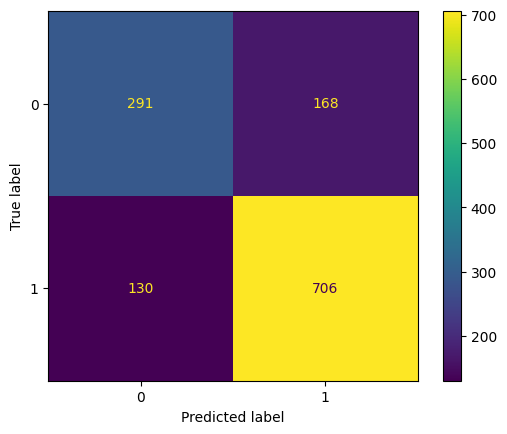

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [81]:
X.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol
0,0.180,0.31,1.4,0.036,14.0,75.0,11.1
1,0.395,0.07,1.3,0.035,26.0,102.0,10.6
2,0.560,0.28,1.7,0.368,16.0,56.0,9.3
3,0.220,0.34,1.4,0.023,56.0,115.0,11.7
4,0.270,0.53,2.4,0.074,6.0,18.0,12.0


In [82]:
X_transformed = preprocessor.fit_transform(X)

In [83]:
Counter(y)

Counter({1: 4100, 0: 2375})

In [85]:
X_transformed.shape

(6475, 7)

In [86]:
len(y)

6475

In [88]:
smt = SMOTEENN(sampling_strategy = "minority" , random_state = 42)
X_final , y_final = smt.fit_resample(X_transformed , y)

In [89]:
Counter(y_final)

Counter({0: 2940, 1: 2432})

In [90]:
X_train , X_test , y_train , y_test = train_test_split(X_final , y_final , random_state = 42 , test_size = 0.2)

In [92]:
tuned_report2 = evaluate_models(X = X_final , y = y_final , models = best_models)
tuned_report2

Model: Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9958
- F1 score: 0.9954
- Precision: 0.9969
- Recall: 0.9939
- Roc Auc Score: 0.9957
----------------------------------
Model performance for Test set
- Accuracy: 0.9423
- F1 score: 0.9343
- Precision: 0.9403
- Recall: 0.9284
- Roc Auc Score: 0.9409


Model: KNN Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9619
- F1 score: 0.9565
- Precision: 0.9637
- Recall: 0.9495
- Roc Auc Score: 0.9606




,Model Name,Accuracy
1,KNN Classifier,0.961860
0,Random Forest Classifier,0.942326


In [93]:
best_models = {
    "Random Forest Classifier" : RandomForestClassifier(**best_params['RandomForest']), 
    "KNN Classifier" : KNeighborsClassifier(**best_params['KNN'])
}

In [94]:
best_model = KNeighborsClassifier(**best_params['KNN'])
best_model.fit(X_train , y_train)

,n_neighbors,11
,weights,'distance'
,algorithm,'kd_tree'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [95]:
y_pred = best_model.predict(X_test)

In [96]:
score = accuracy_score(y_test , y_pred)
cr = classification_report(y_test , y_pred)

print(f"Accuracy Score: {score}")
print(cr)

Accuracy Score: 0.9618604651162791
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       600
           1       0.96      0.95      0.96       475

    accuracy                           0.96      1075
   macro avg       0.96      0.96      0.96      1075
weighted avg       0.96      0.96      0.96      1075



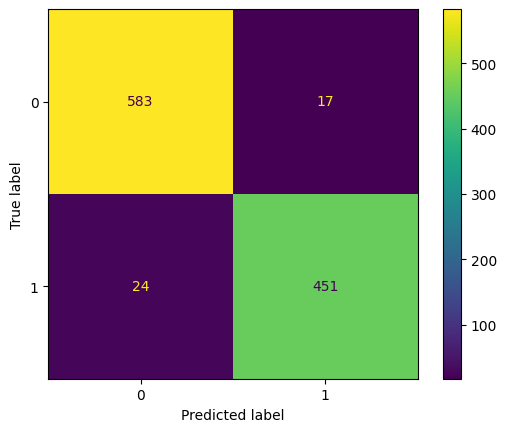

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)